In [42]:
#importing needed libraries 
import anndata
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# load the data H5AD file
# data is a H5AD file object and contains the gene expression matrix (data.X), cell metadata (data.obs), and gene metadata (data.var)
data = anndata.read_h5ad('/home/data/raw/coin-seq/dixit/DixitRegev2016.h5ad') #this is the path to the data, might vary

In [44]:
X = data.X # Accessing the gene expression matrix. data is an anndata object, and X is a sparse matrix representing expression data
# info about the orignal dataset
print('number of genes: ', data.n_vars) # columns
print('number of cells: ', data.n_obs) # rows

# for working with the cell metadata (data.obs)
cells = data.obs # each row represents a different cell, and the columns represent metadata associated with that cell

# for working with the gene metadata (data.var)
genes = data.var # each row represents a different gene, and the columns represent metadata associated with that gene

# for working with the dataset annotations (prob not needed)
info = data.uns  # the only overload key is neighbors suggesting the data was processed using neighborhood based analysis (clustering or dimensionality reduction)

number of genes:  23529
number of cells:  51898


In [45]:
#accessing all the control cells

count = 0
control = 0
cell_names = data.obs_names #each row in the expression matrix represents a cell, and each cell has a unique idenifer name
controlCells = [] #this will be used to store the identifcation names of all the cells (all cells have a unique 'name')

while count < 51898:
    if cells.perturbation[count] == 'control':
        controlCells.append(cell_names[count])
        control = control + 1

    count = count + 1

print("there are ", control, " control cells")


there are  1445  control cells


In [46]:
#make a sub matrix of the expression matrix only for control cells
subset_obs_names = controlCells #list of observation names to subset
subset_X = data.X[data.obs_names.isin(subset_obs_names)] #subset the .X matrix to only include the desired rows
subset_adata = anndata.AnnData(subset_X) #creating a new anndata object with the subsetted expression matrix
subset_adata.obs_names = subset_obs_names

newX = subset_adata.X
print('number of genes: ', subset_adata.n_vars) # columns (this should not be different fron the orignal .X matrix)
print('number of cells: ', subset_adata.n_obs) # rows (this will be different from the orignal .X matrix as not all cells are control cells)
print(newX.todense())

number of genes:  23529
number of cells:  1445
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
#accessing all the cells with a specified perturbation

count2 = 0
perturbCells = 0
foundCells = [] #this will be used to store the cell 'names' that have a specific perturbation

while count2 < 51898:
    if cells.perturbation[count2] == 'p-sgYY1-10': #change this depending on perturbation of intrest
        foundCells.append(cell_names[count2])
        perturbCells = perturbCells + 1

    count2 = count2 + 1

print("there are ", perturbCells, " cells with the specified perturbation")

there are  917  cells with the specified perturbation


In [48]:
#make a sub matrix of the expression matrix only for cells with a perturbation of interest
subset_obs_names2 = foundCells #list of observation names to subset
subset_X2 = data.X[data.obs_names.isin(subset_obs_names2)] #subset the .X matrix to only include the desired rows
subset_adata2 = anndata.AnnData(subset_X2) #creating a new anndata object with the subsetted expression matrix
subset_adata.obs_names2 = subset_obs_names2

newX2 = subset_adata2.X
print('number of genes: ', subset_adata2.n_vars) # columns (this should not be different fron the orignal .X matrix)
print('number of cells: ', subset_adata2.n_obs) # rows (this will be different from the orignal .X matrix as not all cells are control cells)
print(newX2.todense())

number of genes:  23529
number of cells:  917
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<class 'numpy.ndarray'>


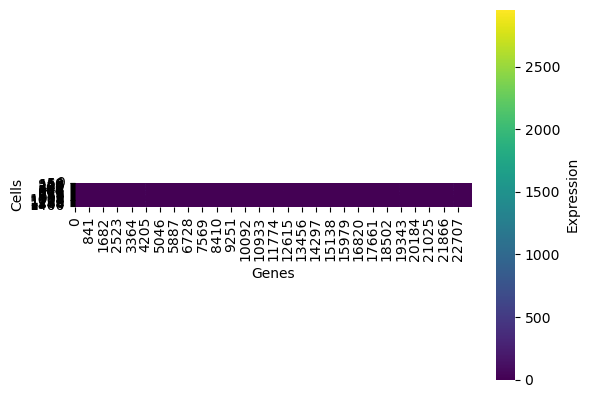

In [51]:
# creating heatmaps of the expression data
# with each row representing a cell and each column representing a gene
# the color of each cell in the heatmap corresponds to the expression level of the gene in the corresponding cell, with darker colors indicating higher expression levels

X_array = newX.toarray()
print(type(X_array))


sns.heatmap(X_array, cmap='viridis', cbar_kws={'label': 'Expression'}, square=True)
plt.xlabel('Genes')
plt.ylabel('Cells')
plt.show()

In [ ]:
# used for printing cell metadata about a cell based on a specified condition
# there are 15 obs attributes: 'perturbation', 'grna_lenient', 'target', 'moi', 'cell_line', 'celltype', 'perturbation_type', 'cancer', 'disease', 'guide_id', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts'
counter = 0
found = 0
while counter < 51898:
    if 'control' in cells.perturbation[counter]: #condition can be changed
        print('idenifier: ', cell_names[counter])
        print('perturbation: ' + cells.perturbation[counter])
        print('grna_lenient: ' , cells.grna_lenient[counter])
        print('target: ' , cells.target[counter])
        print('moi: ' + cells.moi[counter])
        print('cell_line: ' + cells.cell_line[counter])
        print('cell type: ' + cells.celltype[counter])
        print('perturbation_type: ' + cells.perturbation_type[counter])
        print('cancer:  ' , cells.cancer[counter])
        print('disease: ' + cells.disease[counter])
        print('guide_id: ' + cells.guide_id[counter])
        print('ncounts: ' , cells.ncounts[counter])
        print('ngenes: ' , cells.ngenes[counter])
        print('percent_mito: ' + cells.perturbation_type[counter])
        print('percent_ribo: ' ,cells.percent_ribo[counter])
        print('nperts: ' , cells.nperts [counter])
        print("\n")

        found = found + 1 
        
    counter = counter + 1

print(found, " cells were found")